In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/archive (1).zip')

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


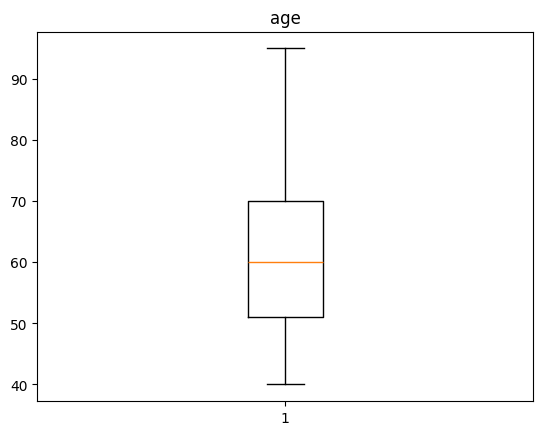

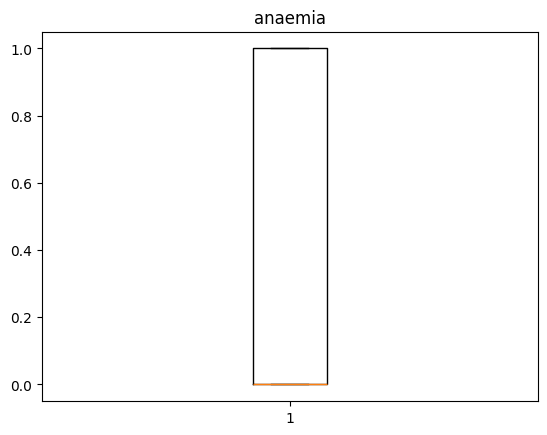

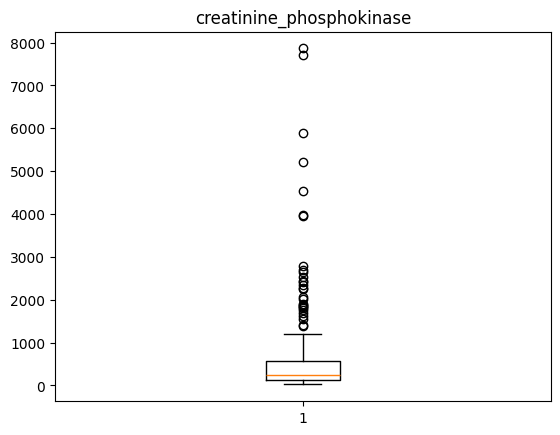

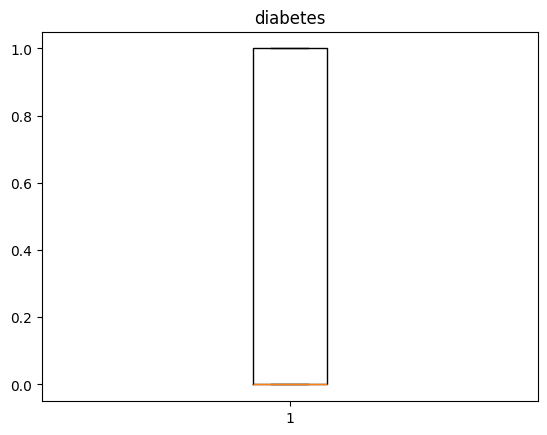

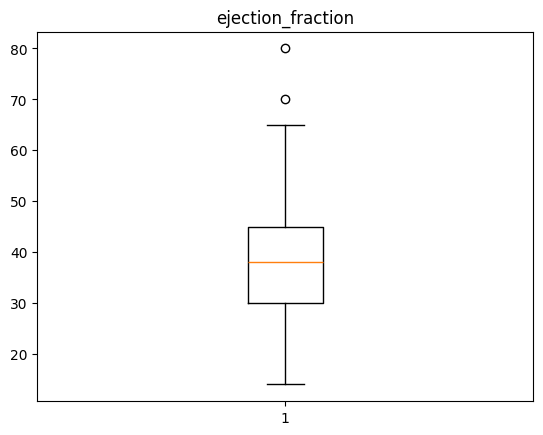

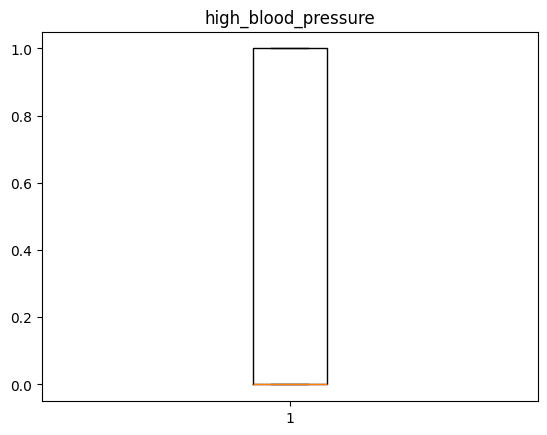

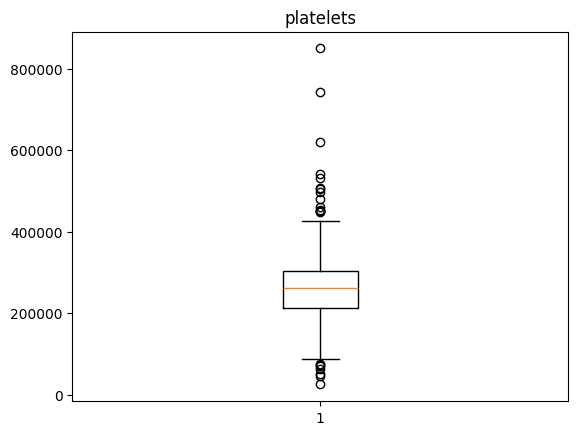

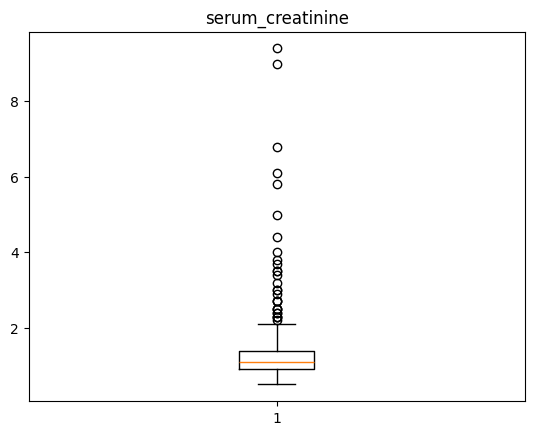

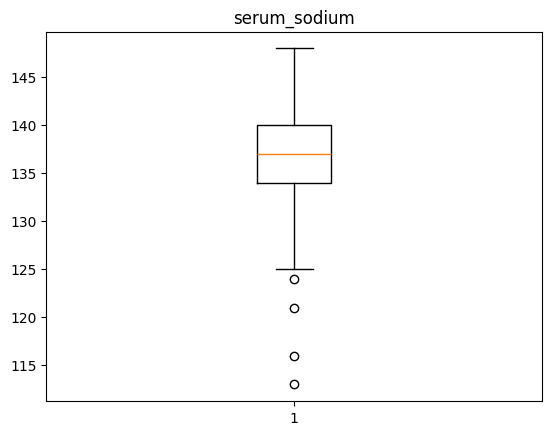

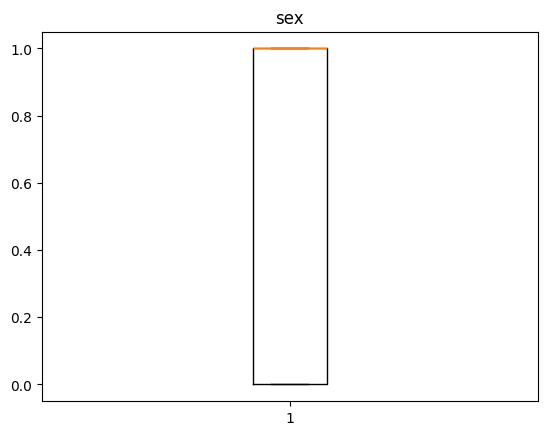

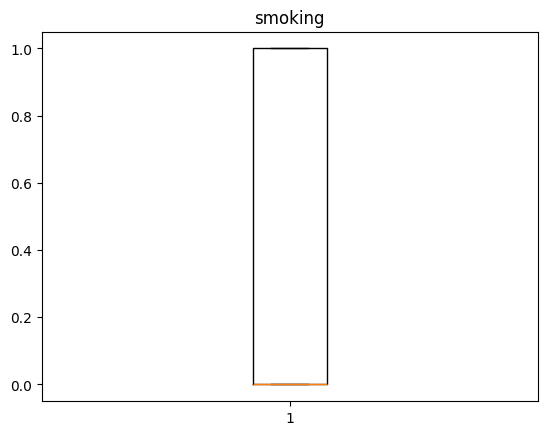

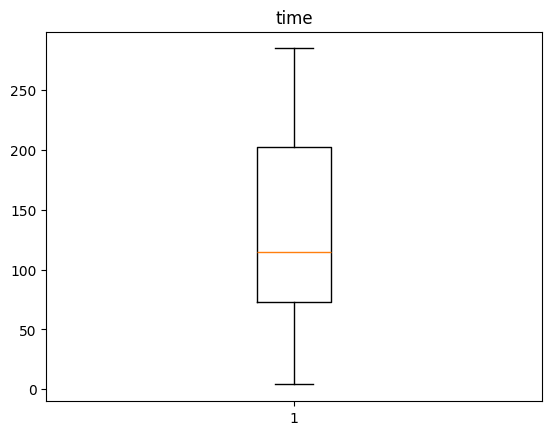

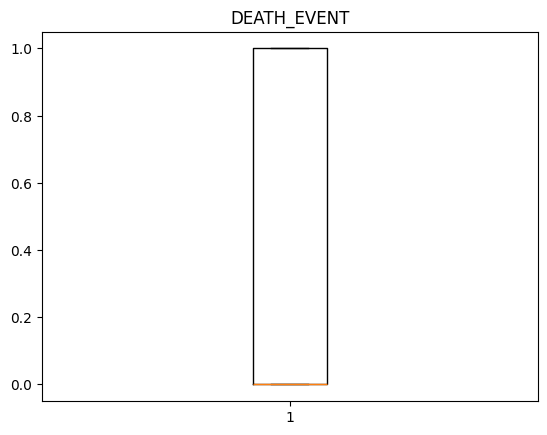

In [9]:
for i in df.columns:
    plt.figure()
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()

In [10]:
 def remove_outliers(df):

  df = df.copy()
  for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
      continue
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[df[col] >= lower_bound]
    df = df[df[col] <= upper_bound]
  return df


In [11]:
df=remove_outliers(df)

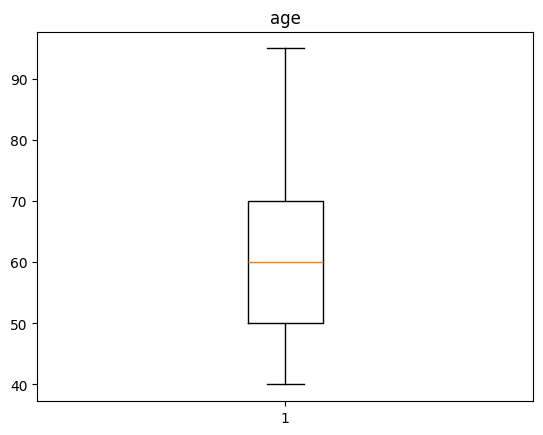

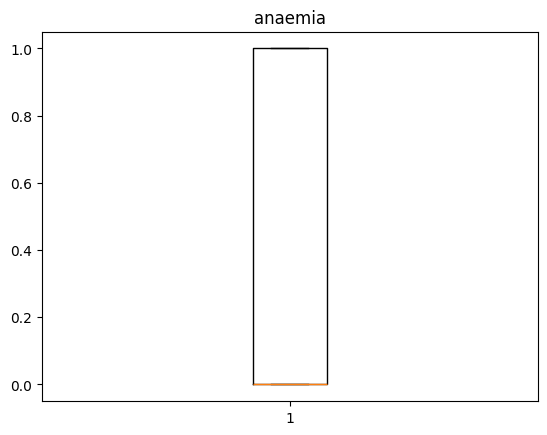

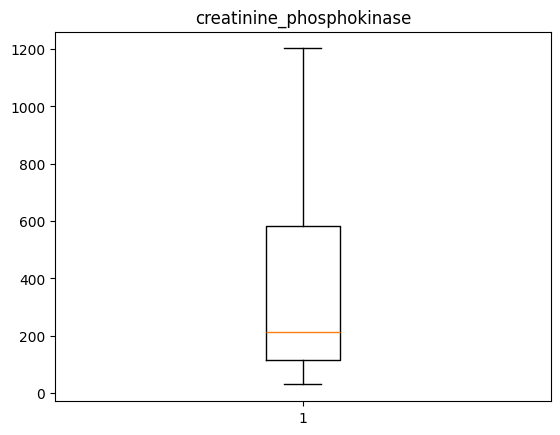

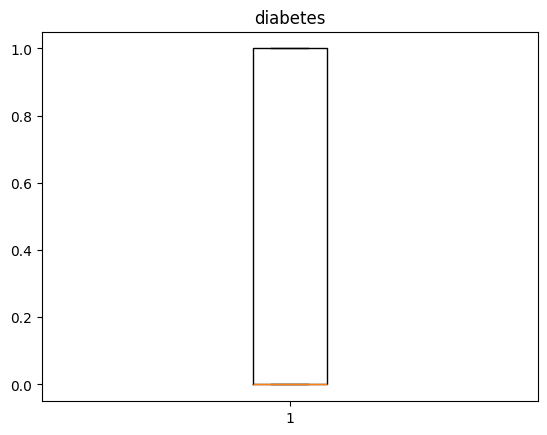

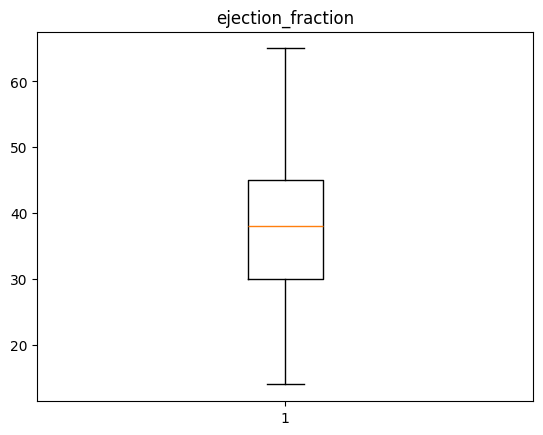

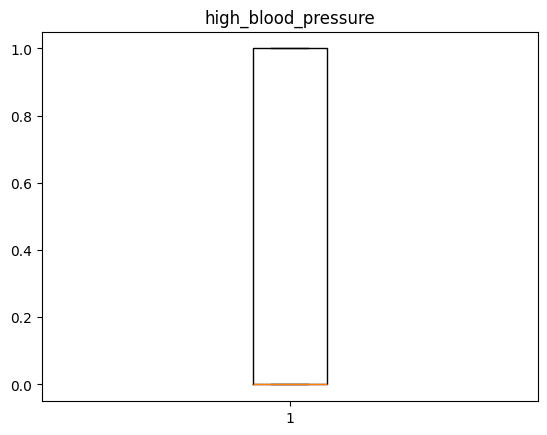

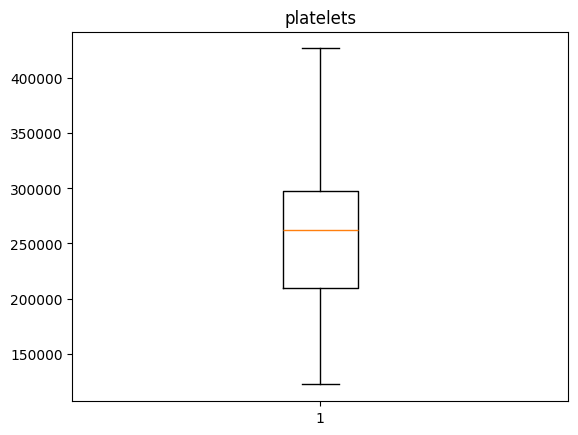

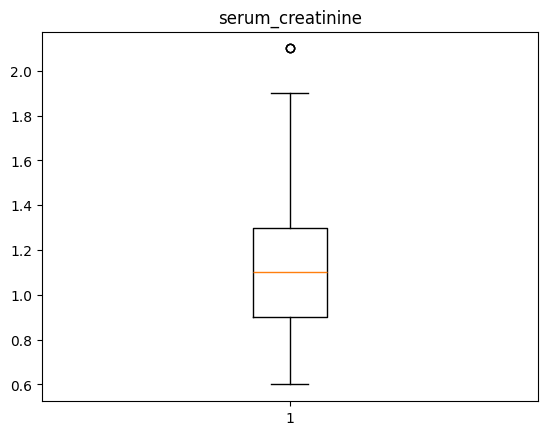

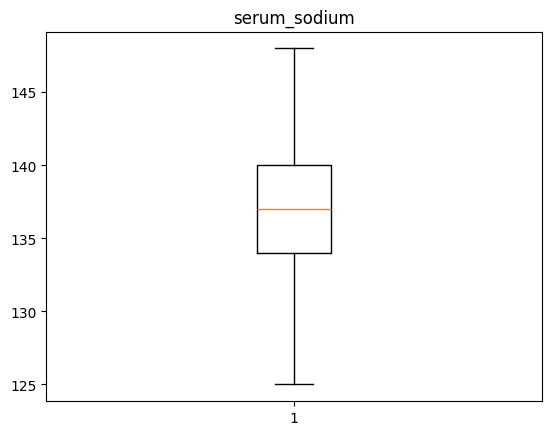

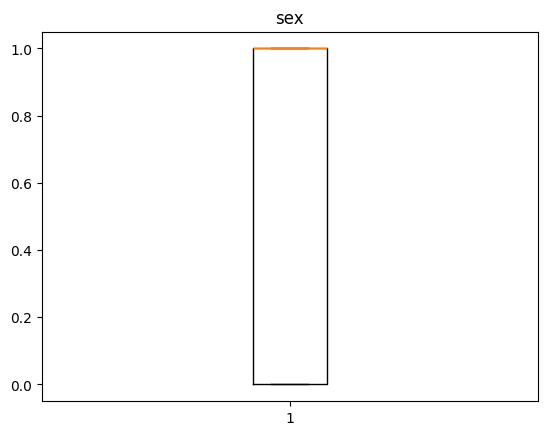

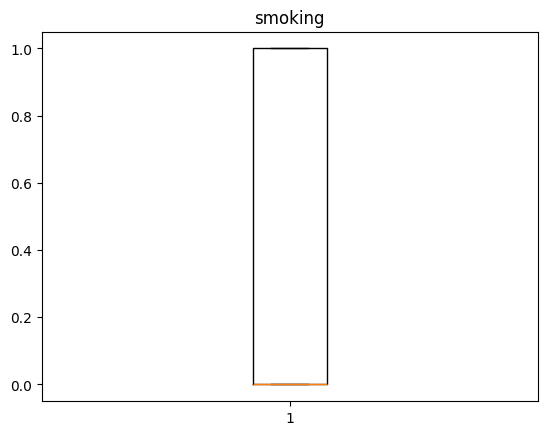

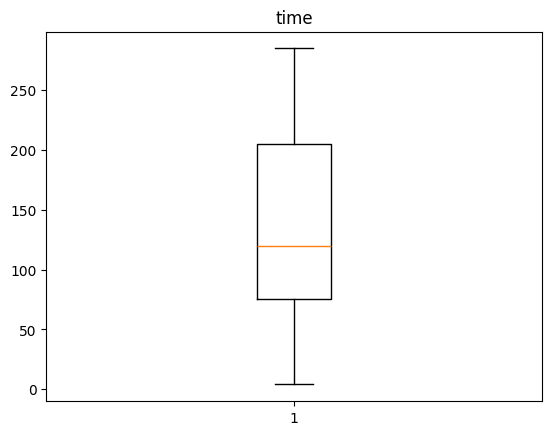

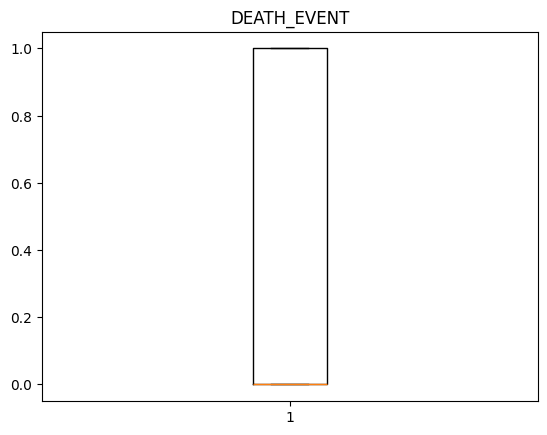

In [12]:
for i in df.columns:
    plt.figure()
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()

In [13]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.053539,0.029417,-0.035489,0.085668,0.122613,-0.090753,0.277358,-0.024793,0.031341,-0.003437,-0.227897,0.282100
anaemia,0.053539,1.000000,-0.204293,-0.019261,-0.011293,0.021316,0.016587,-0.005744,0.073751,-0.102687,-0.148455,-0.084116,0.068454
creatinine_phosphokinase,0.029417,-0.204293,1.000000,0.000761,-0.124547,-0.014055,0.027437,0.119707,-0.121298,-0.058015,-0.058020,0.119300,0.048815
diabetes,-0.035489,-0.019261,0.000761,1.000000,0.026488,0.062085,-0.013930,-0.005966,-0.131460,-0.140246,-0.120369,0.061295,-0.032478
ejection_fraction,0.085668,-0.011293,-0.124547,0.026488,1.000000,0.058123,0.083675,-0.197565,0.169013,-0.122567,-0.084964,0.058918,-0.305454
high_blood_pressure,0.122613,0.021316,-0.014055,0.062085,0.058123,1.000000,0.083800,-0.047779,0.019875,-0.108344,-0.065429,-0.231826,0.079622
platelets,-0.090753,0.016587,0.027437,-0.013930,0.083675,0.083800,1.000000,-0.033240,0.008382,-0.132695,-0.028553,0.037306,-0.065993
serum_creatinine,0.277358,-0.005744,0.119707,-0.005966,-0.197565,-0.047779,-0.033240,1.000000,-0.216217,0.146300,-0.025052,-0.111504,0.348548
serum_sodium,-0.024793,0.073751,-0.121298,-0.131460,0.169013,0.019875,0.008382,-0.216217,1.000000,-0.050111,0.042244,0.027019,-0.112804
sex,0.031341,-0.102687,-0.058015,-0.140246,-0.122567,-0.108344,-0.132695,0.146300,-0.050111,1.000000,0.473090,0.018674,0.037374


In [14]:
df.drop(['anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking'],axis = 1, inplace = True)

<Axes: >

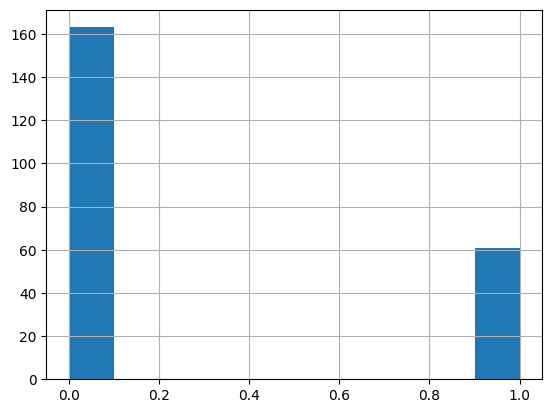

In [15]:
df['DEATH_EVENT'].hist()

In [16]:
from sklearn.utils import resample
died=df[df.DEATH_EVENT==1]
survived = df[df.DEATH_EVENT==0]

# upsample minority
died_upsampled = resample(died,
                          replace=True,
                          n_samples=len(survived),
                          random_state=0)

df_balanced = pd.concat([survived, died_upsampled])

<Axes: >

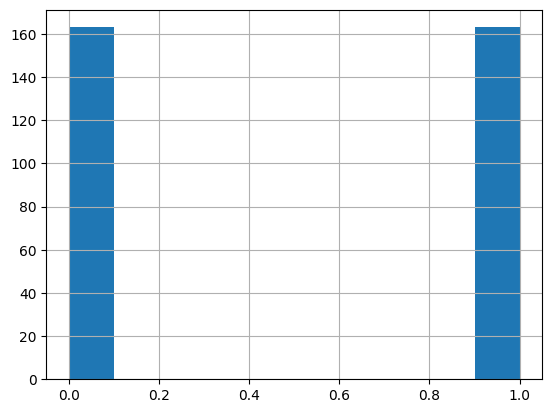

In [17]:
df_balanced['DEATH_EVENT'].hist()

In [18]:
x=df_balanced.drop('DEATH_EVENT',axis=1)
y=df_balanced['DEATH_EVENT']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


model = LogisticRegression(class_weight='balanced', max_iter=1000)
#cross validation
from sklearn.model_selection import cross_val_score
val_scores = cross_val_score(model, x_train_scaled, y_train, cv=5)
print(val_scores)


[0.80769231 0.86538462 0.82692308 0.82692308 0.76923077]


In [26]:
val_scores.mean()

np.float64(0.8192307692307692)

In [27]:
model.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [28]:
y_pred = model.predict(x_test_scaled)

In [29]:
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", test_accuracy)
print("\nClassification report:\n", classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred)
print("AUC score:", auc_score)

Test set accuracy: 0.8636363636363636

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88        36
           1       0.86      0.83      0.85        30

    accuracy                           0.86        66
   macro avg       0.86      0.86      0.86        66
weighted avg       0.86      0.86      0.86        66

AUC score: 0.8611111111111112


In [33]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(
    criterion='gini',     #entropy gives less accuracy
    max_depth=None,
    random_state=42
)


cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


model.fit(x_train_scaled, y_train)




y_pred = model.predict(x_test_scaled)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred)
print("AUC score:", auc_score)

Cross-validation scores: [0.81609195 0.86206897 0.94186047]
Mean CV score: 0.8733404615521696
Test accuracy: 0.9393939393939394

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.88      1.00      0.94        30

    accuracy                           0.94        66
   macro avg       0.94      0.94      0.94        66
weighted avg       0.95      0.94      0.94        66

AUC score: 0.9444444444444444


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = RandomForestClassifier(random_state=42)
val_scores = cross_val_score(model, x_train_scaled, y_train, cv=5)
print(val_scores)
print(val_scores.mean())
model.fit(x_train_scaled, y_train)


y_pred = model.predict(x_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)
auc_score = roc_auc_score(y_test, y_pred)
print("AUC score:", auc_score)

[0.86538462 0.90384615 0.92307692 0.96153846 0.94230769]
0.9192307692307693
Accuracy: 0.9090909090909091

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        36
           1       0.83      1.00      0.91        30

    accuracy                           0.91        66
   macro avg       0.92      0.92      0.91        66
weighted avg       0.92      0.91      0.91        66


Confusion Matrix:
 [[30  6]
 [ 0 30]]
AUC score: 0.9166666666666667
